# EasyVisa Project
# Kothai Niveda M

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [255]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    plot_confusion_matrix,
    make_scorer,
)
from sklearn.model_selection import GridSearchCV

import scipy.stats as stats

In [256]:
#Loading dataset
df=pd.read_csv("EasyVisa.csv")

## Data Overview

- Observations
- Sanity checks

**View the first 5 rows of the dataset.**

In [257]:
# Viewing the first 5 rows of the dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**View the last 5 rows of the dataset.**

In [258]:
# Viewing the last 5 rows of the dataset
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**Understanding the shape of the dataset**

In [259]:
# Viewing the shape of the dataset
df.shape

(25480, 12)

#### Observations:
* The dataset has 25480 rows and 12 columns 

**Check data types and number of non-null values for each column.**

In [260]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observations:
- We can see that there are total of 12 columns and 25,480 rows in the dataset.
- Most columns' data type are of object type, except for prevailing_wage which is float64 type and no_of_employees and yr_of_estab which are int64 type. 
- We can convert object data type to categorical data type.
- The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.

**Converting Object data types into Categorical data types.**

In [261]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
df['case_id'] = df.case_id.astype('category')
df['continent'] = df.continent.astype('category')
df['education_of_employee'] = df.education_of_employee.astype('category')
df['has_job_experience'] = df.has_job_experience.astype('category')
df['requires_job_training'] = df.requires_job_training.astype('category')
df['region_of_employment'] = df.region_of_employment.astype('category')
df['unit_of_wage'] = df.unit_of_wage.astype('category')
df['full_time_position'] = df.full_time_position.astype('category')
df['case_status'] = df.case_status.astype('category')


# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


#### Observations:
- Now there are 9 categorical columns and 3 numeric columns.
- Total memory usage has decreased now.

**Check missing values for each column.**

In [262]:
# Checking missing values for each column.
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observations:
- There are no missing values in the data.

**Summary of the dataset**

In [263]:
# This code will show us a summary of both numerical and non-numerical variables.
# .T gives us a transpose of the matrix for better visualization.

df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
* `case_id`: This is just an identifier for each employee.
* `continent`: Majority of the employees are from Asia, about 66%. There are 6 unique continents.
* `education_of_employee`:Majority of the employeees hold a Bachelor's degree, about 40%. There are 4 unique levels of education.
* `has_job_experience`: Majority of the employees have job experience, about 58%
* `requires_job_training`: Majority of the employees do not require job training, about 88%
* `no_of_employees`: The mean number of employees in a company are about 5667. The minimum number is -26 which is not possible, we need to check later. There is a huge difference in the 75th percentile and maximum value. 
* `yr_of_estab`: Some companies were established as early as 1800 while some companies were established very recently in 2016. 
* `region_of_employment`: Majority of employees intend to work in the Northeast region of US, about 28%. There are 5 unique regions.
* `prevailing_wage`: The mean prevailing wage is around 74455.81 USD. The min is extremely low at 2.14 USD. This might be refering to the hourly wage, but even then it is extremely low and quite not possible, we need to check later. There is a huge difference in the 75th percentile and maximum value. 
* `unit_of_wage`: Majority of the units are Year, about 90%. There are 4 unique units.
* `full_time_position`: Majority of the positions are full-time, about 89%
* `case_status`: Majority of the visas were certified, about 67%

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate Analysis

In [264]:
# This function will give a boxplot and histogram combined along the same scale for any input numerical variable.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # We are going to have 2 rows for the subplot grid.
        sharex=True,  # this indicates x-axis will be shared among the subplots.
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # the height ratio of the plots would be 1:3
        figsize=figsize,)
    
    # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # a boxplot will be plotted with 
    # a green triangle representing the mean value.
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2) # a histogram will be plotted with bins if specified in the input, 
    # else it will automatically plot it's own bins.
    
    # Adding mean and median lines for histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Adding mean line.
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")  # Adding median line.

In [265]:
# This function will give a labeled barplot for us to explore categorical variables.


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot

### 1. case_id

In [266]:
# check unique Booking ID
df['case_id'].value_counts().shape

(25480,)

#### Observations:
* There are 25480 unique case_id. case_id is just an identifier for the employees.

### 2. continent

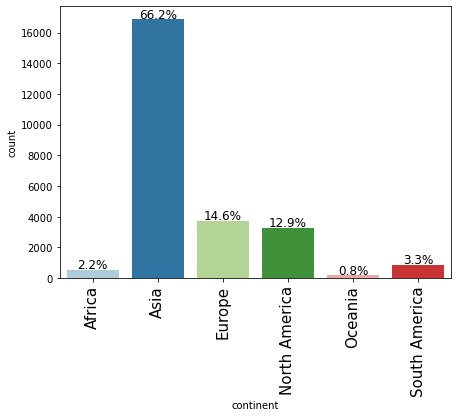

In [267]:
labeled_barplot(df, 'continent', perc=True)

#### Observations:
* Majority (66.2%) of employees are from Asia, followed by 14.6% from Europe and 12.9% from North America.

### 3. education_of_employee

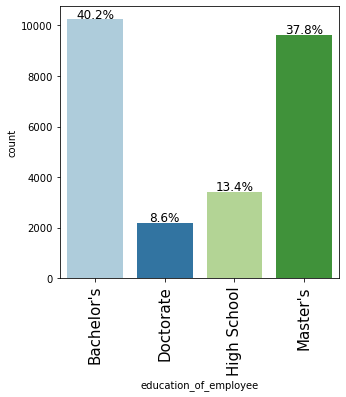

In [268]:
labeled_barplot(df, 'education_of_employee', perc=True)

#### Observations:
* Majority (40.2%) of employees hold a bachelor's degree, followed by 37.8% of employees hold a master's degree and 13.4% of employees hold a high school degree.

### 4. has_job_experience

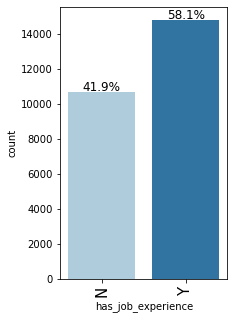

In [269]:
labeled_barplot(df, 'has_job_experience', perc=True)

#### Observations:
* Majority (58.1%) of employees have job experience.

### 5. requires_job_training

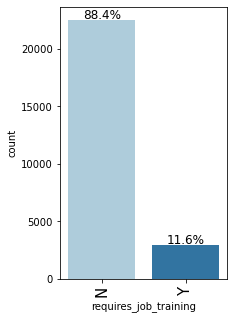

In [270]:
labeled_barplot(df, 'requires_job_training', perc=True)

#### Observations:
* Majority (88.4%) of employees do not require job training.

### 6. no_of_employees

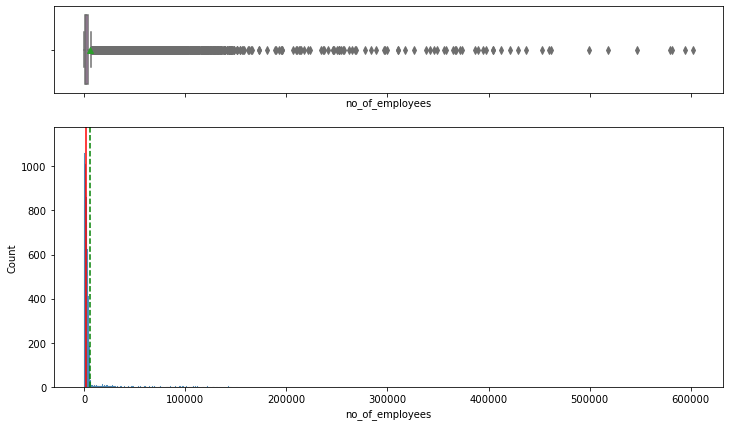

In [271]:
histogram_boxplot(df, 'no_of_employees')

#### Observations:
* There is a wide range in the number of employees in a company with a maximum number of about 600000.
* The distribution is right skewed. 
* As mentioned earlier, the minimum number of employees is -26 which is not possible. 

**Let's check rows with number of employees lesser than or equals to 0**

In [272]:
df[(df.no_of_employees <= 0)]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


#### Observations:
- There are many employees in companies with a negative number of employees which is not possible. 
- We will treat them as missing values and impute them later. 

In [273]:
# Lets first create a copy of the data first to avoid changes to original data
df1=df.copy()

# Next impute the missing values as nan
idx = df1[df1.no_of_employees <= 0].index
df1.loc[idx, "no_of_employees"] = np.nan

**Now lets check if there are any negative values still for no_of_employees**

In [274]:
df1[(df1.no_of_employees <= 0)]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


#### Observations:
- Now there are no more negative values for no_of_employees.

### 7. yr_of_estab

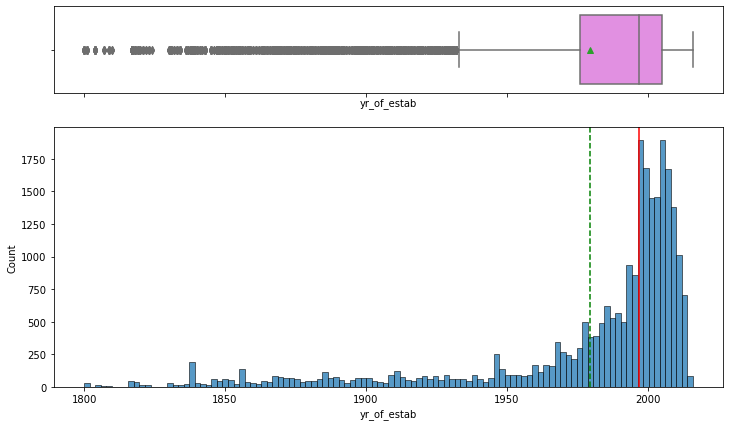

In [275]:
histogram_boxplot(df1, 'yr_of_estab')

#### Observations
- There is a wide range in the year of establishment, ranging from as early as 1800 to 2016.
- Majority of the year of establishments are around 2000 and after. 
- The distribution is left-skewed.

### 8. region_of_employment

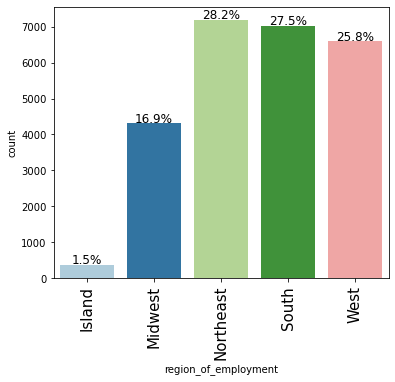

In [276]:
labeled_barplot(df1, 'region_of_employment', perc=True)

#### Observations
* Majority (28.2%) of employees intend to work in the Northeast, followed by 27.5% in the South and 25.8% in the West.

### 9. prevailing_wage

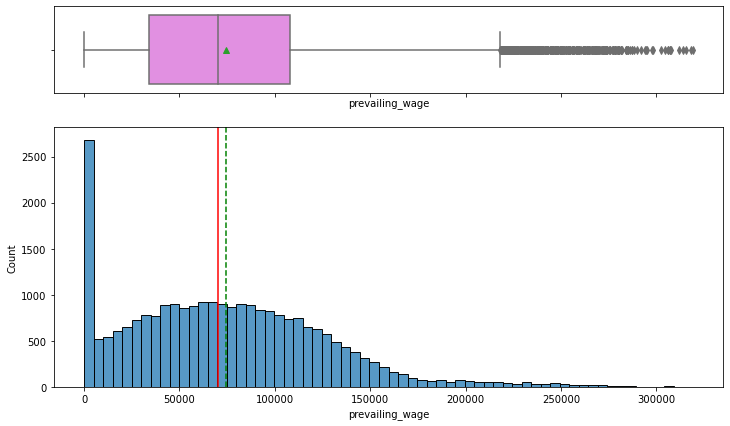

In [277]:
histogram_boxplot(df1, 'prevailing_wage')

#### Observations:
- There is a wide range in the prevailing wage, with wages as low as 2.14 USD.
- The mean and median wage is around 70000 USD.
- The distribution is right skewed.
- Number of employees having a prevailing wage of less than or equal to 5000 USD has the highest count. 
- Some employees have a prevailing wage that is as high as about 300000 USD. 

**In 2016, which was the most recent year of establishment of a company in this data set, the federal minimum wage was 7.25 USD per Hour. This has not changed till now. Assuming some companies still might underpay their employees, lets check for the rows with prevailing_wage that is less than 6.50 USD per hour, 260 USD per week (40 Hours), 1040 USD per month (4 weeks) and 13,520 USD per year (52 weeks)**

In [278]:
df1[(df1.prevailing_wage <= 6.50) & (df1.unit_of_wage == 'Hour')]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
634,EZYV635,Asia,Master's,N,N,834.0,1977,Northeast,3.3188,Hour,Y,Denied
5455,EZYV5456,North America,Doctorate,Y,Y,2038.0,2007,Northeast,3.4889,Hour,Y,Certified
8914,EZYV8915,Asia,Bachelor's,N,N,4427.0,1998,Northeast,5.6396,Hour,Y,Denied
13544,EZYV13545,North America,High School,Y,N,3191.0,2003,Northeast,5.0899,Hour,Y,Denied
17448,EZYV17449,South America,Master's,Y,N,4421.0,1999,Northeast,3.0031,Hour,Y,Denied
19425,EZYV19426,North America,Bachelor's,Y,N,2051.0,2004,Northeast,5.1868,Hour,Y,Denied
19593,EZYV19594,Asia,Master's,N,N,528.0,2004,Northeast,5.4108,Hour,Y,Certified
20482,EZYV20483,North America,Bachelor's,N,N,2584.0,1900,South,6.3305,Hour,Y,Denied
20575,EZYV20576,North America,Master's,N,N,1552.0,2004,Northeast,2.1367,Hour,Y,Certified
22855,EZYV22856,North America,High School,Y,N,564.0,1991,South,2.9561,Hour,Y,Denied


In [279]:
df1[(df1.prevailing_wage <= 260) & (df1.unit_of_wage == 'Week')]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [280]:
df1[(df1.prevailing_wage <= 1040) & (df1.unit_of_wage == 'Month')]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [281]:
df1[(df1.prevailing_wage <= 13520) & (df1.unit_of_wage == 'Year')]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
16,EZYV17,Europe,Master's,Y,N,76638.0,1991,Midwest,3706.79,Year,Y,Certified
36,EZYV37,Europe,High School,Y,N,2520.0,1981,West,2490.12,Year,Y,Denied
59,EZYV60,Asia,Doctorate,N,N,2624.0,2012,Midwest,4949.28,Year,Y,Certified
67,EZYV68,Europe,Doctorate,Y,N,2070.0,1847,West,5319.49,Year,Y,Certified
76,EZYV77,Europe,Bachelor's,Y,N,2423.0,1838,West,2927.34,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25414,EZYV25415,Europe,Master's,N,N,724.0,1998,West,7546.99,Year,Y,Denied
25417,EZYV25418,Asia,Master's,Y,N,5853.0,2011,West,8119.26,Year,Y,Certified
25426,EZYV25427,Europe,Doctorate,N,N,171.0,1977,South,7058.51,Year,Y,Certified
25460,EZYV25461,Europe,Master's,Y,Y,413.0,1997,West,8263.47,Year,Y,Certified


#### Observations:
- 1442 rows have values for prevailing_wage that are lesser than the federal minimum wage. 
- We will treat these as missing values and impute them later.

In [282]:
# Impute inacurate data as nan
idx = df1[(df1.prevailing_wage <= 6.50) & (df1.unit_of_wage == 'Hour')].index
df1.loc[idx, "prevailing_wage"] = np.nan

In [283]:
# Impute innacurate data as nan
idx = df1[(df1.prevailing_wage <= 13520) & (df1.unit_of_wage == 'Year')].index
df1.loc[idx, "prevailing_wage"] = np.nan

### 10. unit_of_wage

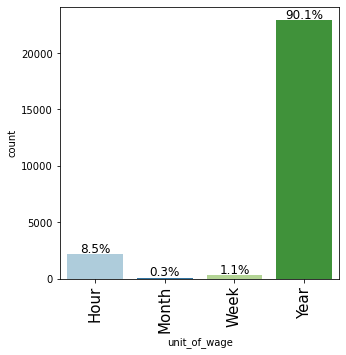

In [284]:
labeled_barplot(df1, 'unit_of_wage', perc=True)

#### Observations
* Majority (90.1%) of the units are in years, followed by 8.5% in hours and 1.1% in weeks.

### 11. full_time_position

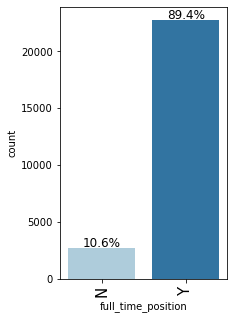

In [285]:
labeled_barplot(df1, 'full_time_position', perc=True)

#### Observations:
- Majority (89.4%) of the positions are full-time. 

### 12. case_status

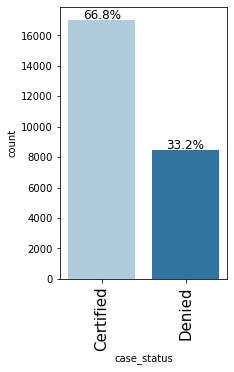

In [286]:
labeled_barplot(df1, 'case_status', perc=True)

#### Observations:
- Majority (66.8%) of the Visas were certified. 

## Bivariate Analysis

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### 1. continent vs case_status

case_status    Certified  Denied
continent                       
Africa               397     154
Asia               11012    5849
Europe              2957     775
North America       2037    1255
Oceania              122      70
South America        493     359


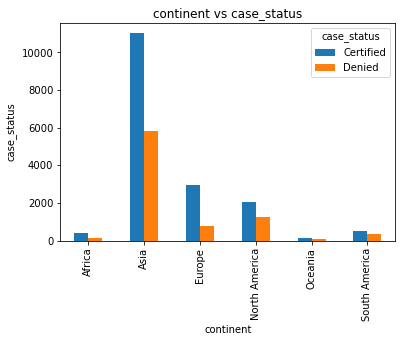

In [287]:
# Cross tabulation between continent and case_status
crosstab=pd.crosstab(index=df1['continent'],columns=df1['case_status'])
print(crosstab)
 
# Grouped bar chart of continent vs case_status
crosstab.plot.bar()
plt.title('continent vs case_status')
plt.ylabel ('case_status')
plt.show ()

#### Observations:
- Q2. How does the visa status vary across different continents? : Europe has the highest percentage of visa certifications of about 79%, followed by Africa which has about 72%, Asia with about 65%, Oceania with about 64%, North America with about 62% and South America has the lowest percentage at about 58%

### 2. education_of_employee vs case_status

case_status            Certified  Denied
education_of_employee                   
Bachelor's                  6367    3867
Doctorate                   1912     280
High School                 1164    2256
Master's                    7575    2059


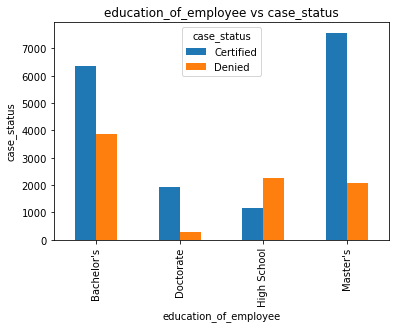

In [288]:
# Cross tabulation between education_of_employee and case_status
crosstab=pd.crosstab(index=df1['education_of_employee'],columns=df1['case_status'])
print(crosstab)
 
# Grouped bar chart of education_of_employee vs case_status
crosstab.plot.bar()
plt.title('education_of_employee vs case_status')
plt.ylabel ('case_status')
plt.show ()

#### Observations:
- Q1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? : Employees with a Doctorate qualification have the highest percentage of visa certifications of about 87%, followed by Master's which has about 79% and Bachelor's with about 62%. High School qualification has the lowest percentage at about 34%. So the answer is yes, education does play a role in Visa certification. The more you study the higher chances of getting visa certification. 

### 3. has_job_experience vs case_status

case_status         Certified  Denied
has_job_experience                   
N                        5994    4684
Y                       11024    3778


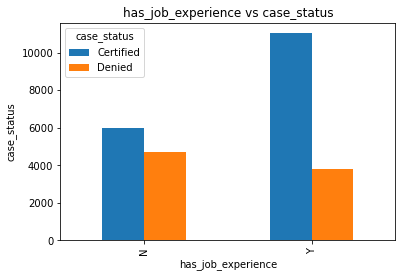

In [289]:
# Cross tabulation between has_job_experience and case_status
crosstab=pd.crosstab(index=df1['has_job_experience'],columns=df1['case_status'])
print(crosstab)
 
# Grouped bar chart of has_job_experience vs case_status
crosstab.plot.bar()
plt.title('has_job_experience vs case_status')
plt.ylabel ('case_status')
plt.show ()

#### Observations:
- Q3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? : Employees with work experience have a higher percentage of visa certifications of about 74% as compared to those who do not have work experience, their visa certification percentage is lower at 56%. Hence, the answer is yes, work experience does influence visa status. Having work experience increases the chances of getting visa certification.

### 4. requires_job_training vs case_status

case_status            Certified  Denied
requires_job_training                   
N                          15012    7513
Y                           2006     949


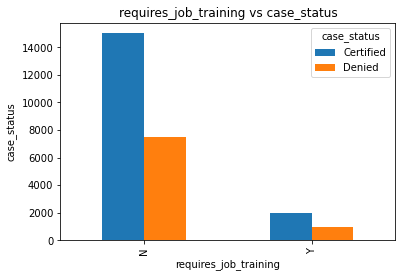

In [290]:
# Cross tabulation between requires_job_training and case_status
crosstab=pd.crosstab(index=df1['requires_job_training'],columns=df1['case_status'])
print(crosstab)
 
# Grouped bar chart of requires_job_training vs case_status
crosstab.plot.bar()
plt.title('requires_job_training vs case_status')
plt.ylabel ('case_status')
plt.show ()

#### Observations:
- Employees requiring job training have a slightly higher percentage of visa certifications of about 70% as compared to those who do not require any job training (67%).

### 5. no_of_employees vs case_status

In [291]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

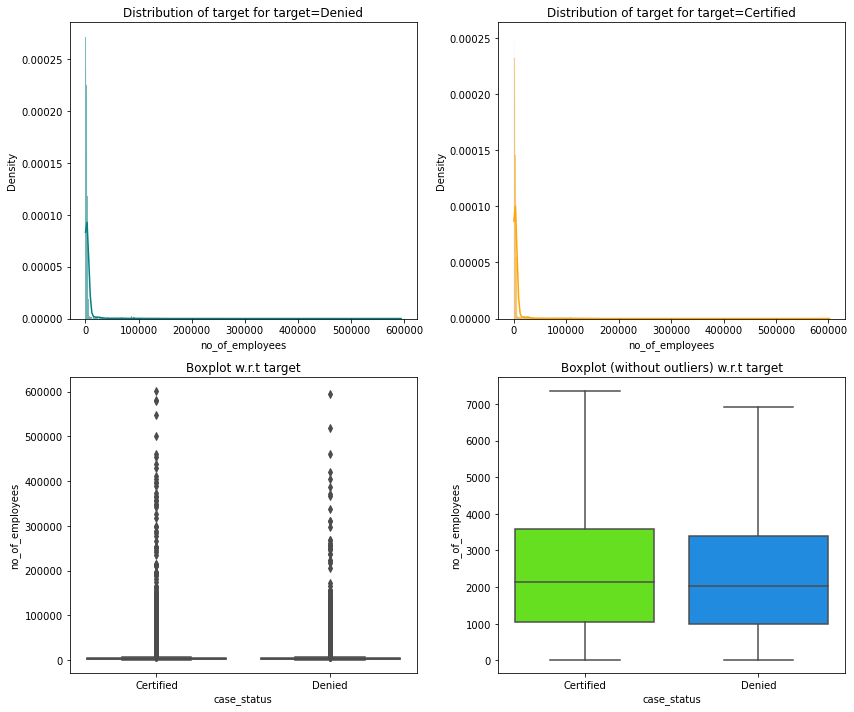

In [292]:
distribution_plot_wrt_target(df1, "no_of_employees", "case_status")

#### Observations:
- The distribution of number of employees for certified and denied visa status is quite similar.
- Employees from companies with a greater number of employees have a slightly higher chance of getting visa certifications.

### 6. yr_of_estab vs case_status

case_status  Certified  Denied
yr_of_estab                   
1800                11       5
1801                 6       6
1804                10       8
1807                 4       2
1809                 5       4
...                ...     ...
2012               329     163
2013               379     154
2014               118      57
2015                36      28
2016                13      10

[199 rows x 2 columns]


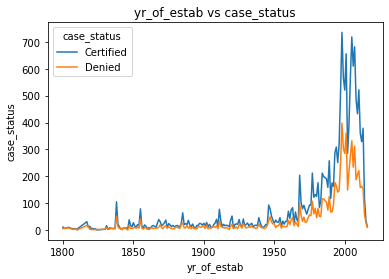

In [293]:
# Cross tabulation between yr_of_estab and case_status
crosstab=pd.crosstab(index=df1['yr_of_estab'],columns=df1['case_status'])
print(crosstab)
 
# Grouped bar chart of yr_of_estab vs case_status
crosstab.plot.line()
plt.title('yr_of_estab vs case_status')
plt.ylabel ('case_status')
plt.show ()

#### Observations:
- Initially the number of certified and denied cases were similar. Then the number of certified cases started to increase more than the number of denied cases starting from about the 1970s till about 2010, after which the number of certified cases dropped and started to look similar to the number of denied cases.

### 7. region_of_employment vs case_status

case_status           Certified  Denied
region_of_employment                   
Island                      226     149
Midwest                    3253    1054
Northeast                  4526    2669
South                      4913    2104
West                       4100    2486


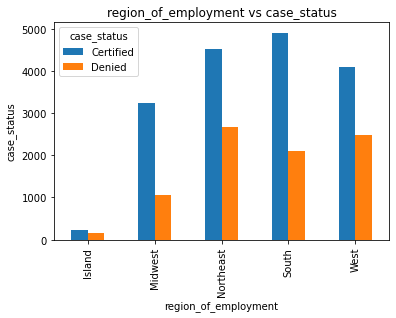

In [294]:
# Cross tabulation between region_of_employment and case_status
crosstab=pd.crosstab(index=df1['region_of_employment'],columns=df1['case_status'])
print(crosstab)
 
# Grouped bar chart of region_of_employment vs case_status
crosstab.plot.bar()
plt.title('region_of_employment vs case_status')
plt.ylabel ('case_status')
plt.show ()

#### Observations:
- Employees who intend to work in the Midwest region have the highest percentage of visa certifications of about 76%, followed by South which has about 70%, Northeast with about 63%, West with about 62% and Island with about 60%. 

### 8. prevailing_wage vs case_status

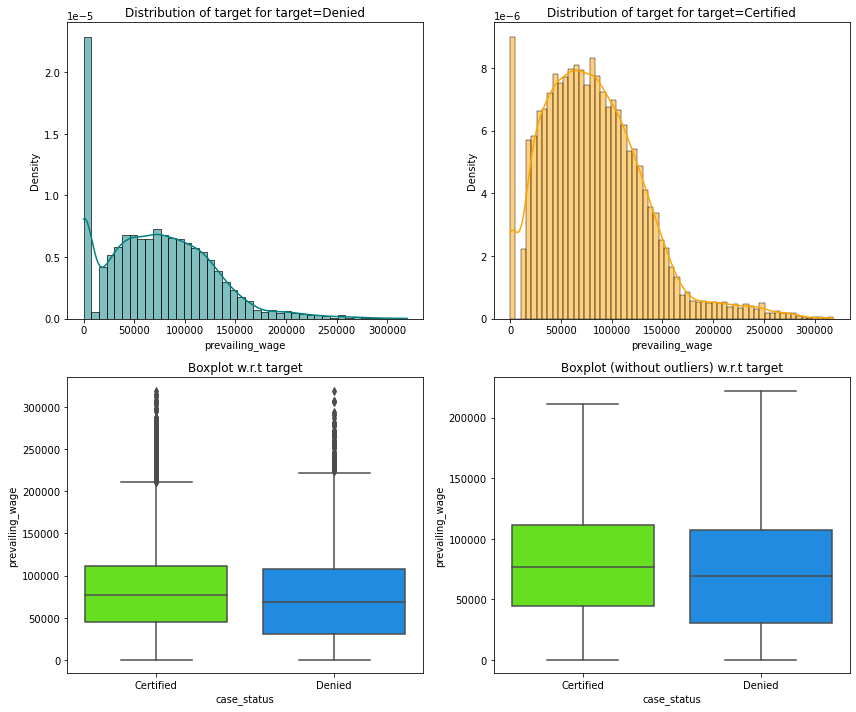

In [295]:
distribution_plot_wrt_target(df1, "prevailing_wage", "case_status")

#### Observations:
- Q5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage? : The distribution of prevailing wage for certified and denied case status is quite similar. Employees with a higher prevailing wage have a slightly higher chance of visa denial.

### 9. unit_of_wage vs case_status

case_status   Certified  Denied
unit_of_wage                   
Hour                747    1410
Month                55      34
Week                169     103
Year              16047    6915


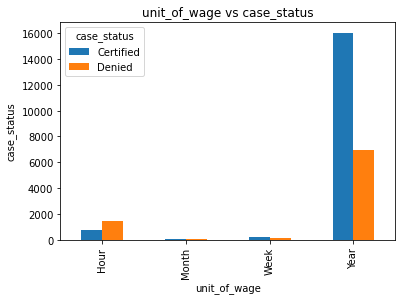

In [296]:
# Cross tabulation between unit_of_wage and case_status
crosstab=pd.crosstab(index=df1['unit_of_wage'],columns=df1['case_status'])
print(crosstab)
 
# Grouped bar chart of unit_of_wage vs case_status
crosstab.plot.bar()
plt.title('unit_of_wage vs case_status')
plt.ylabel ('case_status')
plt.show ()

#### Observations:
- Q4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? : Year pay unit is most likely to be certified for a visa as it has the highest percentage of visa certifications of about 70%. This is followed by Week and Month pay unit which both have 62%. Hour pay unit has the lowest percentage of visa certifications of about 35%

### 10. full_time_position vs case_status

case_status         Certified  Denied
full_time_position                   
N                        1855     852
Y                       15163    7610


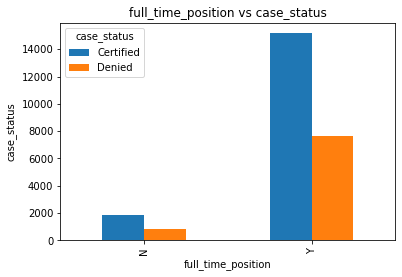

In [297]:
# Cross tabulation between full_time_position and case_status
crosstab=pd.crosstab(index=df1['full_time_position'],columns=df1['case_status'])
print(crosstab)
 
# Grouped bar chart of full_time_position vs case_status
crosstab.plot.bar()
plt.title('full_time_position vs case_status')
plt.ylabel ('case_status')
plt.show ()

#### Observations:
- Both full time and part time positions have about similar percentages of visa certifications (67% and 69% respectively).

### Heatmap

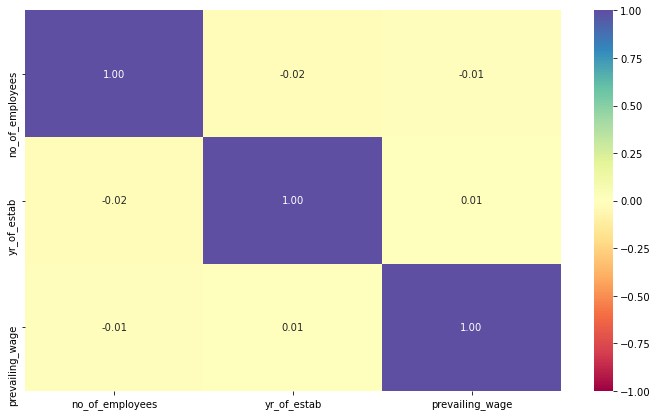

In [298]:
# plotting a heatmap of all numerical variables
cols_list = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
- The numerical variables do not have much correlation.

### Summary of EDA:


**Data Description:**

* The dataset has 25480 rows and 12 columns of data.
* There are no null values in the original dataset. However, there are some inaccurate data that have been imputed as missing values that will have to be treated later in data-preprocessing (refer to Data Cleaning section).
* prevailing_wage, no_of_employees and yr_of_estab are of integer data type while other columns are of object type which have been changed to categorical type. 


**Observations from EDA:**

* `case_id` : There are 25480 unique case_id. case_id is just an identifier for the employees.
* `continent` : Majority (66.2%) of employees are from Asia, followed by 14.6% from Europe and 12.9% from North America.  Europe has the highest percentage of visa certifications of about 79%, followed by Africa which has about 72%, Asia with about 65%, Oceania with about 64%, North America with about 62% and South America has the lowest percentage at about 58%
* `education_of_employee` : Majority (40.2%) of employees hold a bachelor's degree, followed by 37.8% of employees hold a master's degree and 13.4% of employees hold a high school degree. Employees with a Doctorate qualification have the highest percentage of visa certifications of about 87%, followed by Master's which has about 79% and Bachelor's with about 62%. High School qualification has the lowest percentage at about 34%. Education plays a role in Visa certification. The more you study the higher chances of getting visa certification. 
* `has_job_experience` : Majority (58.1%) of employees have job experience. Employees with work experience have a higher percentage of visa certifications of about 74% as compared to those who do not have work experience, their visa certification percentage is lower at ~56%. Work experience also influences visa status. Having work experience increases the chances of getting visa certification.
* `requires_job_training` : Majority (88.4%) of employees do not require job training. Employees requiring job training have a slightly higher percentage of visa certifications of about 70% as compared to those who do not require any job training (67%).
* `no_of_employees` : There is a wide range in the number of employees in a company with a maximum number of about 600000.The minimum number of employees is -26 which is not possible. Upon further findings, there were many such data with a negative number of employees which have been treated as missing values to be imputed later in data preprocessing. The distribution of number of employees for certified and denied visa status is quite similar. Employees from companies with a greater number of employees have a slightly higher chance of getting visa certifications.
* `yr_of_estab` : There is a wide range in the year of establishment, ranging from as early as 1800 to 2016. Majority of the year of establishments are around 2000 and after. Initially the number of certified and denied cases were similar. Then the number of certified cases started to increase more than the number of denied cases starting from about the 1970s till about 2010, after which the number of certified cases dropped and started to look similar to the number of denied cases.
* `region_of_employment` : Majority (28.2%) of employees intend to work in the Northeast, followed by 27.5% in the South and 25.8% in the West. - Employees who intend to work in the Midwest region have the highest percentage of visa certifications of about 76%, followed by South which has about 70%, Northeast with about 63%, West with about 62% and Island with about 60%. 
* `prevailing_wage` : There is a wide range in the prevailing wage, with wages as low as 2.14 USD, which is quite not possible. Upon further findings, there were many rows with inacurate data for prevailing wage and they have been treated as missing values to be imputed later in data preprocessing. The mean and median wage is around 70000 USD. Number of employees having a prevailing wage of less than or equal to 5000 USD has the highest count. Some employees have a prevailing wage that is as high as about 300000 USD. The distribution of prevailing wage for certified and denied case status is quite similar. Employees with a higher prevailing wage have a slightly higher chance of visa denial.
* `unit_of_wage` : Majority (90.1%) of the units are in years, followed by 8.5% in hours and 1.1% in weeks. Year pay unit has the highest percentage of visa certifications of about 70%. This is followed by Week and Month pay unit which both have 62%. Hour pay unit has the lowest percentage of visa certifications of about 35%
* `full_time_position` : Majority (89.4%) of the positions are full-time. Both full time and part time positions have about similar percentages of visa certifications (67% and 69% respectively).
* `case_status` : Majority (66.8%) of the Visas were certified. 


**Data Cleaning that needs to be done in Data Preprocessing step:**

* `case_id` : case_ID is an ID variable and not useful for predictive modeling and hence we can drop it.
* `no_of_employees` : The minimum number of employees is -26 which is not possible. Upon further findings, there were many such data with a negative number of employees which have been treated as missing values to be imputed later in data preprocessing.
* `prevailing_wage` : The minimum wage is 2.14 USD which is quite not possible. Upon further findings, there were many rows with innacurate data for prevailing wage and they have been treated as missing values to be imputed later in data preprocessing.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### 1. Dropping case_id column as it is not needed

In [299]:
# Dropping case_id
df1.drop(["case_id"], axis=1, inplace=True)

In [300]:
# use info() to print a concise summary of the DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25447 non-null  float64 
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        24038 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(2), int64(1)
memory usage: 797.7 KB


#### Observations:
- case_id column has been dropped.

### 2. Missing value treatment

In [301]:
# checking for missing values
df1.isnull().sum()

continent                   0
education_of_employee       0
has_job_experience          0
requires_job_training       0
no_of_employees            33
yr_of_estab                 0
region_of_employment        0
prevailing_wage          1442
unit_of_wage                0
full_time_position          0
case_status                 0
dtype: int64

**For no_of_employees, we will fill the missing values with the median value of the column. We use median as the distribution is skewed and it would be better to use median instead of mean.**

In [302]:
df1['no_of_employees'].fillna(df['no_of_employees'].median(), inplace=True)

**For prevailing_wage, we will impute the missing values by the columns medians grouped by education_of_employee, has_job_experience, region_of_employment, unit_of_wage and full_time_position**

In [303]:
col_impute = [
    "prevailing_wage",
]

for col in col_impute:
    df1[col] = df1.groupby(["education_of_employee", "has_job_experience", "region_of_employment", "unit_of_wage", "full_time_position"])[col].transform(
        lambda x: x.fillna(x.median())
    )

In [304]:
# checking for missing values
df1.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observations:
- All missing values have been imputed.

### 3. Duplicate value check

In [305]:
# Checking for any duplicate values
df1.duplicated().sum()

0

#### Observations:
- There are no duplicates in the data.

### 4. Outlier check

**Let's check for outliers in the data.**

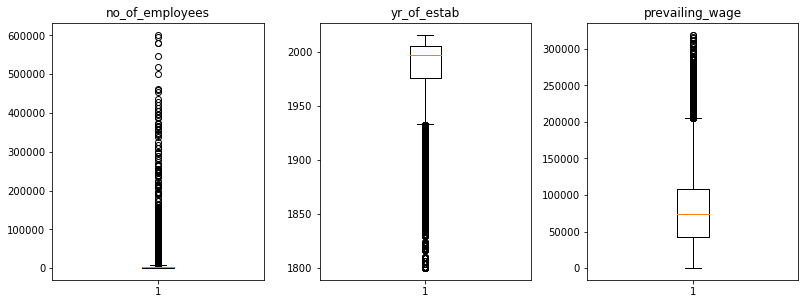

In [306]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

### 5. Data preparation for modelling

In [307]:
# encoding case_status variable: Certified to 1 and Denied to 0
df1["case_status"] = df1["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

# defining the dependent and independent variables
X = df1.drop(["case_status"], axis=1)
y = df1["case_status"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

print(X.head())
print()
print(y.head())

   no_of_employees  yr_of_estab  prevailing_wage  continent_Asia  \
0          14513.0         2007         592.2029               1   
1           2412.0         2002       83425.6500               1   
2          44444.0         2008      122996.8600               1   
3             98.0         1897       83434.0300               1   
4           1082.0         2005      149907.3900               0   

   continent_Europe  continent_North America  continent_Oceania  \
0                 0                        0                  0   
1                 0                        0                  0   
2                 0                        0                  0   
3                 0                        0                  0   
4                 0                        0                  0   

   continent_South America  education_of_employee_Doctorate  \
0                        0                                0   
1                        0                                0   

In [308]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [309]:
# Getting information on train and test sets
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


#### Observations:
- So we have about 32% of Denied visa status and about 67% of Certified visa status in both our training and test set which is a good distribution of Denied and Certified visa status in the data.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [310]:
# This code will show us a summary of both numerical and non-numerical variables.
# .T gives us a transpose of the matrix for better visualization.
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5669.797645,22877.372247,12.0,1028.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,78282.71798,50236.374541,7.0647,42916.61,73906.985,107825.6675,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
- Now we can see no unsual data for the minimum values for no_of_employees and prevailing_wage.
- We have also dropped case_id column. 

## Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting an employee will get visa certified and the employee gets visa denied
2. Predicting an employee will get visa denied and the employee gets visa certified

#### Which case is more important?
- Both cases are important. In the first case we would be increasing the processing time as there would be an additional case that has to go through reviewing and gets denied in the end. In the second case, we would be losing on a valuable employee who has the potential to get visa certified. 

#### How to reduce this loss i.e need to reduce False Negatives?
- Company would want F1 Score to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives and higher the chances of predicting both the classes correctly.
- We will use balanced class weights so that model focuses equally on both classes.

**Let's define function to provide metric scores(accuracy, recall, precision and f1 score) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [311]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [312]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building bagging and boosting models

### 1. Decision Tree Model

In [313]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Checking model performance on training set**

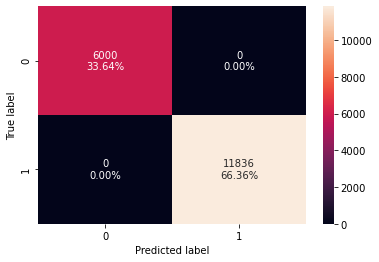

In [314]:
confusion_matrix_sklearn(dtree, X_train, y_train)

**Confusion Matrix -**

* Employee gets visa certified and the model predicted correctly that employee will get visa certified :  True Positive (observed=1,predicted=1)

* Employee gets visa denied and the model predicted employee will get visa certified : False Positive (observed=0,predicted=1)

* Employee gets visa denied and the model predicted correctly that employee will get visa denied : True Negative (observed=0,predicted=0)

* Employee gets visa certified and the model predicted that employee will get visa denied : False Negative (observed=1,predicted=0)

In [315]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


**Checking model performance on test set**

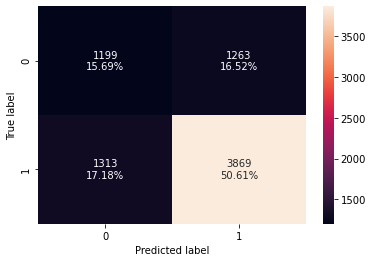

In [316]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [317]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.663004  0.746623   0.753897  0.750242


#### Observations:
- Almost 0 errors on the training set, each sample has been classified correctly.
- Model has performed very well on the training set.
- As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
- However, the model is not able to generalize well on the test data concerning the f1 score. 

### 2. Bagging Classifier

In [318]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

**Checking model performance on training set**

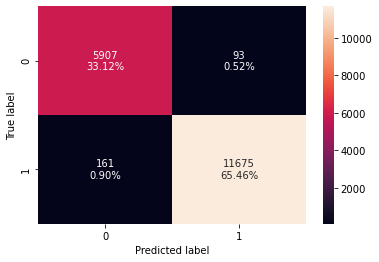

In [319]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [320]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985759  0.986397   0.992097  0.989239


**Checking model performance on test set**

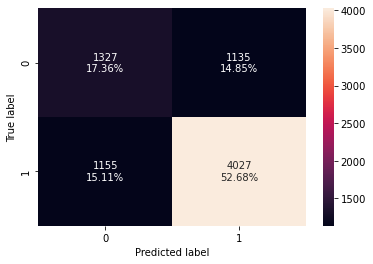

In [321]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [322]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.700419  0.777113   0.780124  0.778616


#### Observations:
- Bagging classifier is also overfitting on the training set. We got a slightly better f1 score for the testing set but it can still be improved.

### 3. Random Forest

In [323]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

**Checking model performance on training set**

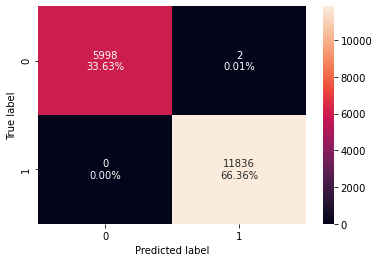

In [324]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [325]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999888     1.0   0.999831  0.999916


**Checking model performance on test set**

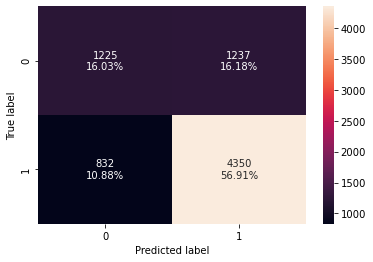

In [326]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [327]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.72933  0.839444   0.778593  0.807874


#### Observations:
- Random Forest is also overfitting in terms of training data. Compared to the bagging model, we have got a slightly better f1 score for the testing set, but there is still room for improvement. 

### 4. Random forest with class weights

In [328]:
rf_wt = RandomForestClassifier(class_weight={0:0.67,1:0.33}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

**Checking model performance on traing set**

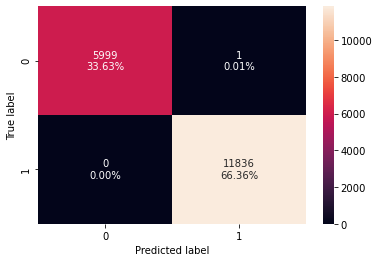

In [329]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [330]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958


**Checking model performance on test set**

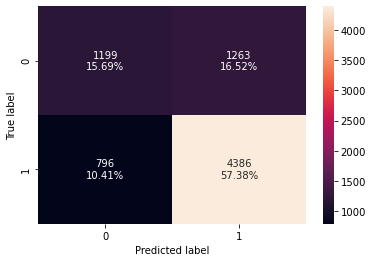

In [331]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [332]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.730638  0.846391   0.776421  0.809898


#### Observations:
- There is not much improvement in f1 score of testing set of weighted random forest as compared to the unweighted random forest.

### 5. Adaboost

In [333]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

**Checking model performance on training set**

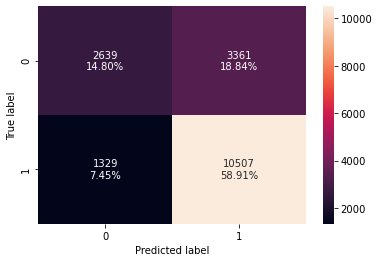

In [334]:
confusion_matrix_sklearn(abc, X_train,y_train)

In [335]:
abc_model_train_perf=model_performance_classification_sklearn(abc, X_train,y_train)
print("Training performance \n",abc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.737049  0.887715   0.757643  0.817538


**Checking model performance on test set**

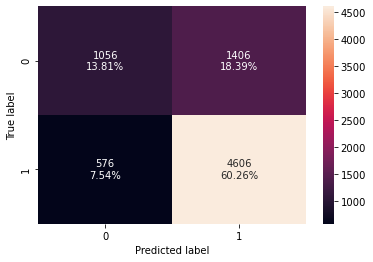

In [336]:
confusion_matrix_sklearn(abc, X_test,y_test)

In [337]:
abc_model_test_perf=model_performance_classification_sklearn(abc, X_test,y_test)
print("Testing performance \n",abc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.740712  0.888846   0.766134  0.822941


#### Observations:
- AdaBoost is generalizing well, we have got similar training and testing performance.
- In fact f1 score of testing set is slightly higher than f1 score of training set. 
- We have got a slightly better f1 score for testing set than in Random Forest. 

### 6.Gradient Boosting Classifier

In [338]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

**Checking model performance on training set**

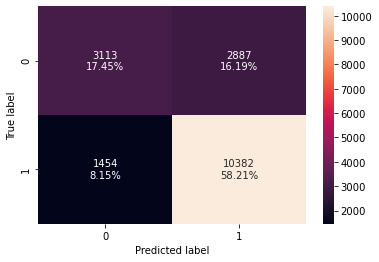

In [339]:
confusion_matrix_sklearn(gbc, X_train,y_train)

In [340]:
gbc_model_train_perf=model_performance_classification_sklearn(gbc, X_train,y_train)
print("Training performance \n",gbc_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.756616  0.877154   0.782425  0.827086


**Checking model performance on test set**

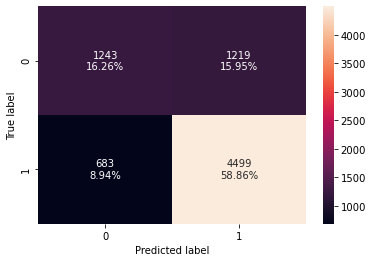

In [341]:
confusion_matrix_sklearn(gbc, X_test,y_test)

In [342]:
gbc_model_test_perf=model_performance_classification_sklearn(gbc, X_test,y_test)
print("Testing performance \n",gbc_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.751177  0.868198   0.786814  0.825505


#### Observations:
- Gradient Boosting is generalizing well also, we have got similar training and testing performance. 
- We have got a slightly better f1 score for testing set than in Adaboosting and this is the highest out of all our untuned models. 

##  Will tuning the hyperparameters improve the model performance?

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

### 1. Tuning Decision Tree model

In [343]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, random_state=1)

**Checking model performance on training set**

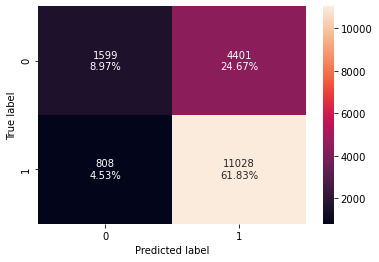

In [344]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [345]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.70795  0.931734   0.714758  0.808949


**Checking performance on test set**

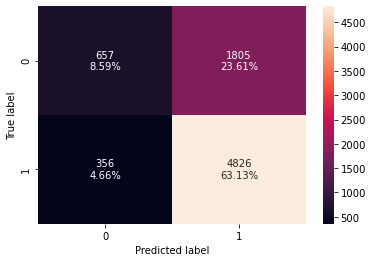

In [346]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [347]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.717295  0.931301   0.727794  0.817066


#### Observations:
- Overfitting in decision tree has reduced. 
- In fact f1 score of testing set is slightly higher than f1 score of training set. 
- f1 score of testing set has increased from 0.75 in untuned Decision Tree model to 0.82 in tuned Decision Tree model. 

**Plotting the feature importance of each variable**

In [348]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee_High School  1.0
no_of_employees                    0.0
has_job_experience_Y               0.0
unit_of_wage_Year                  0.0
unit_of_wage_Week                  0.0
unit_of_wage_Month                 0.0
region_of_employment_West          0.0
region_of_employment_South         0.0
region_of_employment_Northeast     0.0
region_of_employment_Midwest       0.0
requires_job_training_Y            0.0
education_of_employee_Master's     0.0
yr_of_estab                        0.0
education_of_employee_Doctorate    0.0
continent_South America            0.0
continent_Oceania                  0.0
continent_North America            0.0
continent_Europe                   0.0
continent_Asia                     0.0
prevailing_wage                    0.0
full_time_position_Y               0.0


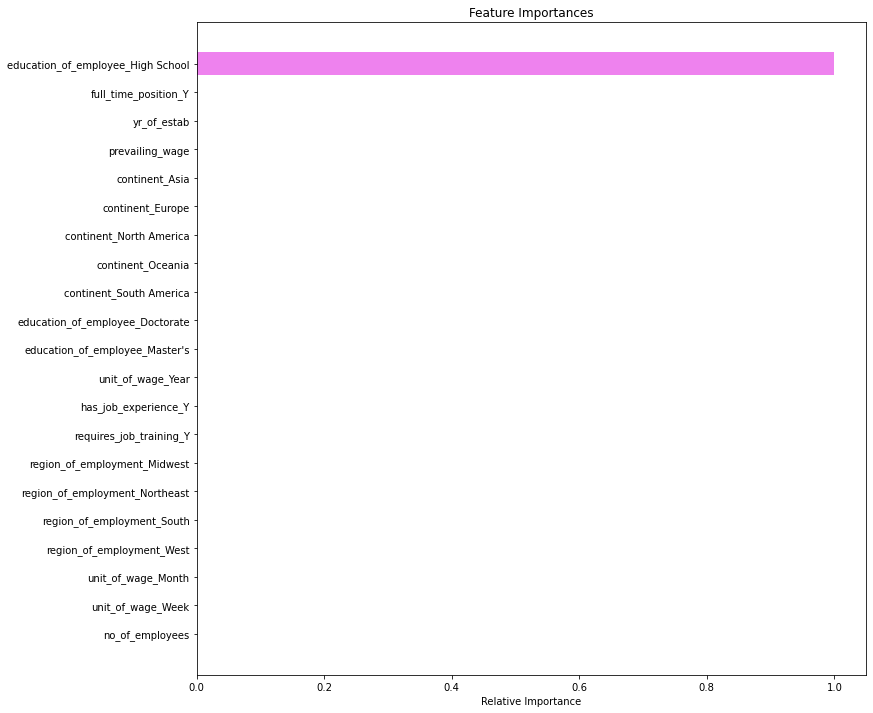

In [349]:
# Plotting the feature importances
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:
- education_of_employee_High School is the most important feature in tuned Decision Tree model.

### 2. Tuning Bagging Classifier

In [351]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight="balanced", random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = scorer, cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  max_features=0.8, n_estimators=101, random_state=1)

**Checking model performance on training set**

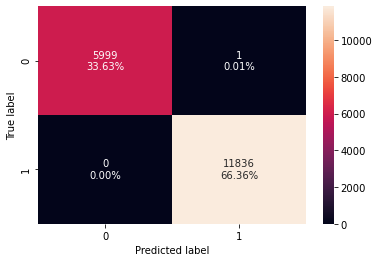

In [352]:
confusion_matrix_sklearn(bagging_estimator, X_train, y_train)

In [353]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958


**Checking model performance on test set**

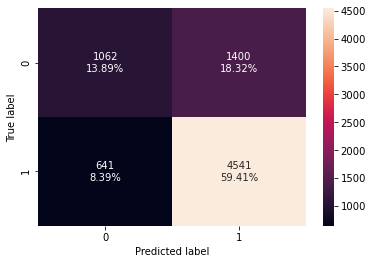

In [354]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [355]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.732993  0.876303   0.764349  0.816506


#### Observations:
- Tuned Bagging model is still overfitting training data. 
- f1 score of testing set has increased from 0.78 to 0.82 which is similar to f1 score of testing set of tuned decision tree model.

**Bagging Classifiers do not have a feature_importances_ attribute so it is not possible to see the feature importance in this model.**

### 3. Tuning Random Forest model

In [357]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'class_weight': [{0: 0.67, 1: 0.33 }],
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=25,
                       max_features='sqrt', oob_score=True, random_state=1)

**Checking model performance on training set**

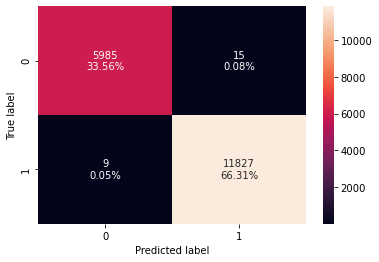

In [358]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [359]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.998654  0.99924   0.998733  0.998986


**Checking model performance on test set**

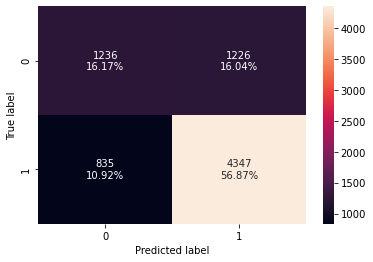

In [360]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [361]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.730377  0.838865   0.780011  0.808368


#### Observations:
- Tuned random forest model is still overfitting training data.
- f1 score of test set is similar in both tuned and untuned random forest models. 

**Plotting the feature importance of each variable**

In [362]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
prevailing_wage                    0.251854
no_of_employees                    0.228978
yr_of_estab                        0.190787
education_of_employee_High School  0.066045
has_job_experience_Y               0.056897
education_of_employee_Master's     0.042100
education_of_employee_Doctorate    0.022100
unit_of_wage_Year                  0.016635
continent_Europe                   0.016268
requires_job_training_Y            0.015560
full_time_position_Y               0.015377
continent_Asia                     0.011487
region_of_employment_Midwest       0.011474
region_of_employment_West          0.011230
continent_North America            0.011043
region_of_employment_South         0.010044
region_of_employment_Northeast     0.010025
continent_South America            0.006080
continent_Oceania                  0.002596
unit_of_wage_Week                  0.002186
unit_of_wage_Month                 0.001235


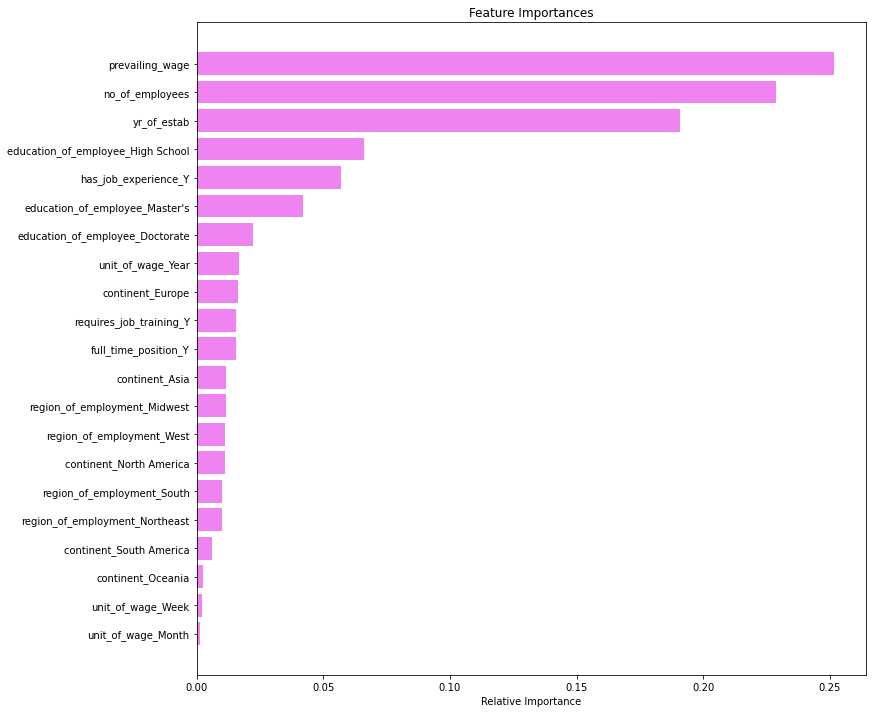

In [363]:
# Plotting the feature importances
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:
- prevailing_wage is the most important feature, followed by no_of_employees and yr_of_estab in tuned Random Forest model.

### 4. Tuning Adaboost model

In [437]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
            #Let's try different max_depth for base_estimator
            "base_estimator":[DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
                              DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
                              DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1)],
            "n_estimators": np.arange(10,110,10),
            "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

**Checking model performance on training set**

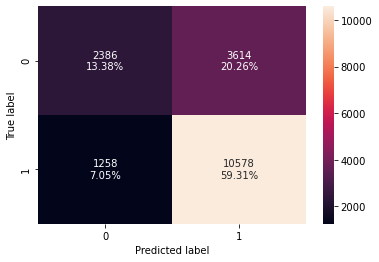

In [439]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [440]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.726845  0.893714   0.745349  0.812817


**Checking model performance on test set**

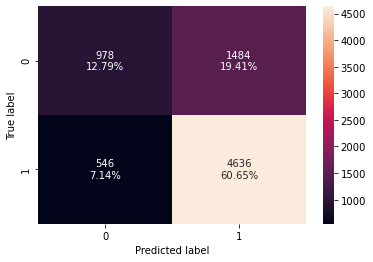

In [441]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [442]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Testing performance \n",abc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734432  0.894635   0.757516  0.820386


#### Observations:
- Similar to the untuned Adaboost model, this tuned Adaboost model is also generalizing well and f1 score of testing set is also slightly higher than f1 score of training set. 
- f1 score of testing set has decreased slightly in tuned Adaboost model (0.820) as compared to untuned Adaboost model (0.823) 

**Plotting the feature importance of each variable**

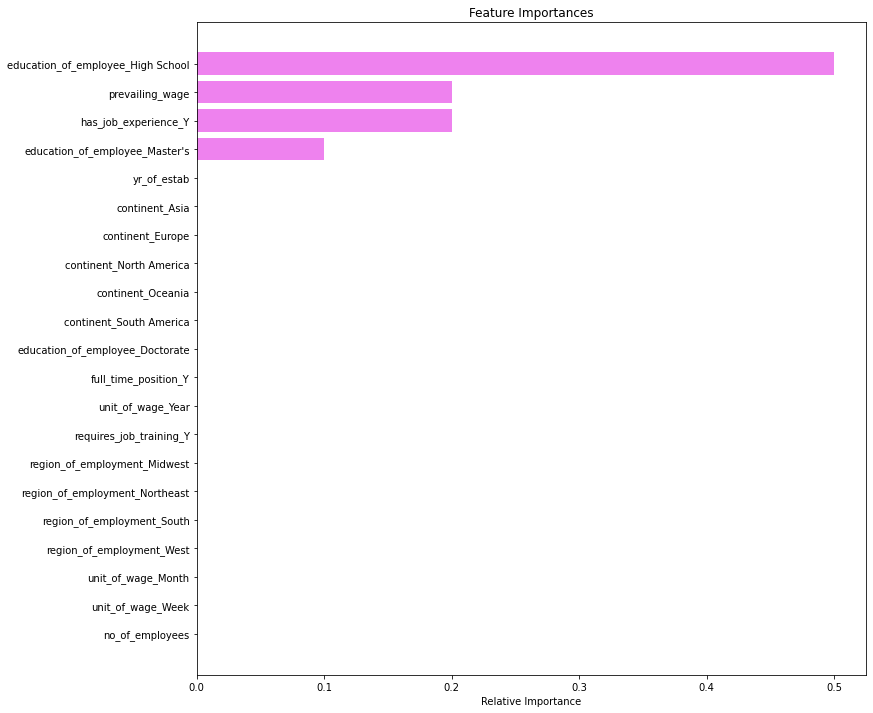

In [443]:
# Plotting the feature importances
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:
- Similar to tuned Decision Tree model, education_of_employee_High School is the most important feature in tuned Adaboost model. 
- After education_of_employee_High School, prevailing_wage and has_job_experience_Y are the next two important features in tuned Adaboost model. 

### 5. Tuning Gradient Boosting model

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [444]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

**Checking model performance on training set**

In [445]:
gbc_init_model_train_perf=model_performance_classification_sklearn(gbc_init, X_train,y_train)
print("Training performance \n",gbc_init_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.755102  0.875718   0.781556  0.825962


**Checking model performance on test set**

In [446]:
gbc_init_model_test_perf=model_performance_classification_sklearn(gbc_init, X_test,y_test)
print("Testing performance \n",gbc_init_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.749477  0.865496   0.786428  0.82407


#### Observations:
- As compared to the model with default parameters:test f1 score has decreased slightly from 0.8255 to 0.8241.
- So, we will just use the default parameters to tune the gradient boosting model.

In [448]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, random_state=1, subsample=0.9)

**Checking model performance on training set**

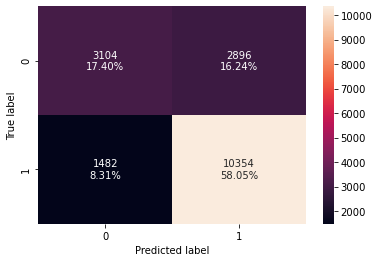

In [449]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [450]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.754541  0.874789   0.781434  0.82548


**Checking model performance on test set**

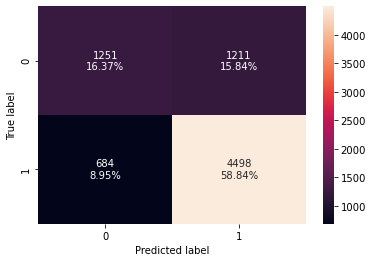

In [451]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [452]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Testing performance \n",gbc_tuned_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.752093  0.868005   0.787879  0.826003


#### Observations:
- Similar to the untuned Gradient Boosting model, tuned Gradient Boosting model also generalizes well.
- f1 score of testing set has increased slightly from 0.8255 in untuned Gradient Boosting model to 0.8260 in tuned Gradient Boosting model. This is the highest f1 score for testing set so far. 

**Plotting the feature importance of each variable**

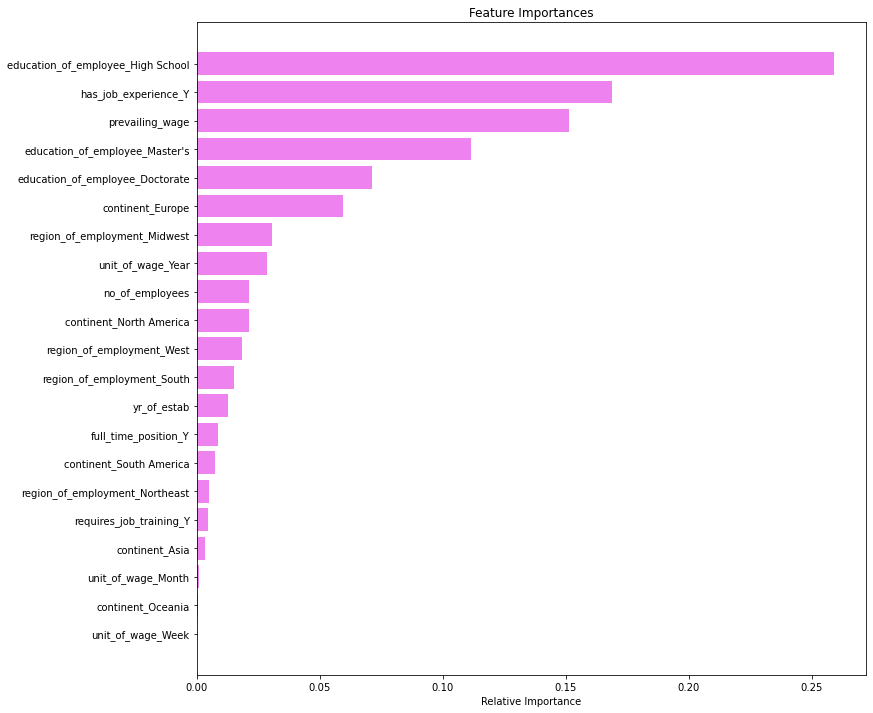

In [453]:
# Plotting the feature importances
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:
- Similar to tuned Decision Tree model and tuned Adaboost model, education_of_employee_High School is the most important feature in tuned Gradient Boosting model. 
- After education_of_employee_High School, has_job_experience_Y and prevailing_wage are the next two important features in tuned Gradient Boosting model. 

## Stacking Model

**Now, let's build a stacking model with the tuned models that give highest f1 score - Bagging, Decision tree and Adaboosting, then use Gradient Boosting to get the final prediction.**

In [454]:
# Define initial estimators and final_estimator
estimators=[('Bagging', bagging_estimator), ('Decision Tree', dtree_estimator),('Adaboosting', abc_tuned)]
final_estimator=gbc_tuned

In [455]:
# Define Stacking Classifier
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)

# Fitting Stacking Classifier on the train data
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                        random_state=1),
                                                  max_features=0.8,
                                                  n_estimators=101,
                                                  random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=2,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Adaboosting',
                                Ada

**Checking model performance on training set**

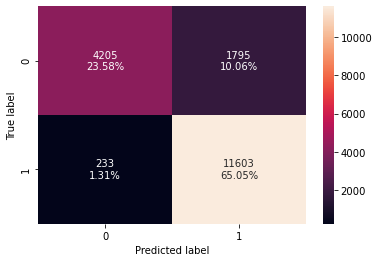

In [456]:
confusion_matrix_sklearn(stacking_estimator, X_train, y_train)

In [457]:
stacking_estimator_model_train_perf=model_performance_classification_sklearn(stacking_estimator, X_train,y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.886297  0.980314   0.866025  0.919632


**Checking model performance on test set**

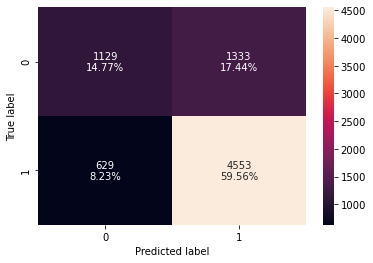

In [458]:
confusion_matrix_sklearn(stacking_estimator, X_test, y_test)

In [459]:
stacking_estimator_model_test_perf=model_performance_classification_sklearn(stacking_estimator, X_test,y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.743328  0.878618    0.77353  0.822732


#### Observations:
- Stacking model seems to be slightly overfitting the data in terms of f1 score. 
- The f1 score of testing set is slightly lower than that of tuned Gradient Boosting model. 

**Stacking Classifiers do not have a feature_importances_ attribute so it is not possible to see the feature importance in this model.**

## Model Performance Comparison and Conclusions

In [460]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_estimator_model_train_perf.T, bagging_model_train_perf.T, 
     bagging_estimator_model_train_perf.T, rf_model_train_perf.T,rf_wt_model_train_perf.T,rf_estimator_model_train_perf.T,
    abc_model_train_perf.T,abc_tuned_model_train_perf.T, gbc_model_train_perf.T,gbc_tuned_model_train_perf.T,
    stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned ",
    "Random Forest Estimator",
    "Random Forest with class weights",
    "Random Forest Tuned",
    "Adaboost",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier Tuned,Random Forest Estimator,Random Forest with class weights,Random Forest Tuned,Adaboost,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,Stacking Classifier
Accuracy,1.0,0.707950,0.985759,0.999944,0.999888,0.999944,0.998654,0.737049,0.726845,0.756616,0.754541,0.886297
Recall,1.0,0.931734,0.986397,1.000000,1.000000,1.000000,0.999240,0.887715,0.893714,0.877154,0.874789,0.980314
Precision,1.0,0.714758,0.992097,0.999916,0.999831,0.999916,0.998733,0.757643,0.745349,0.782425,0.781434,0.866025
F1,1.0,0.808949,0.989239,0.999958,0.999916,0.999958,0.998986,0.817538,0.812817,0.827086,0.825480,0.919632


In [461]:
# test performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, bagging_model_test_perf.T, 
     bagging_estimator_model_test_perf.T, rf_model_test_perf.T,rf_wt_model_test_perf.T,rf_estimator_model_test_perf.T,
    abc_model_test_perf.T,abc_tuned_model_test_perf.T, gbc_model_test_perf.T,gbc_tuned_model_test_perf.T, 
    stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned ",
    "Random Forest Estimator",
    "Random Forest with class weights",
    "Random Forest Tuned",
    "Adaboost",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "Stacking Classifier"
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier Tuned,Random Forest Estimator,Random Forest with class weights,Random Forest Tuned,Adaboost,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,Stacking Classifier
Accuracy,0.663004,0.717295,0.700419,0.732993,0.729330,0.730638,0.730377,0.740712,0.734432,0.751177,0.752093,0.743328
Recall,0.746623,0.931301,0.777113,0.876303,0.839444,0.846391,0.838865,0.888846,0.894635,0.868198,0.868005,0.878618
Precision,0.753897,0.727794,0.780124,0.764349,0.778593,0.776421,0.780011,0.766134,0.757516,0.786814,0.787879,0.773530
F1,0.750242,0.817066,0.778616,0.816506,0.807874,0.809898,0.808368,0.822941,0.820386,0.825505,0.826003,0.822732


#### Observations:
- Untuned Decision Tree, Bagging, Random Forest models and Stacking Classifier are overfitting the training data in terms of f1-score.
- The tuned Gradient Boosting model is giving the highest f1-score on the test data and is also giving a generalized performance.
- Hence, the tuned Gradient Boosting model is the best model here.

**Let's once again see the feature importance of Tuned Gradient Boosting model, our best model**

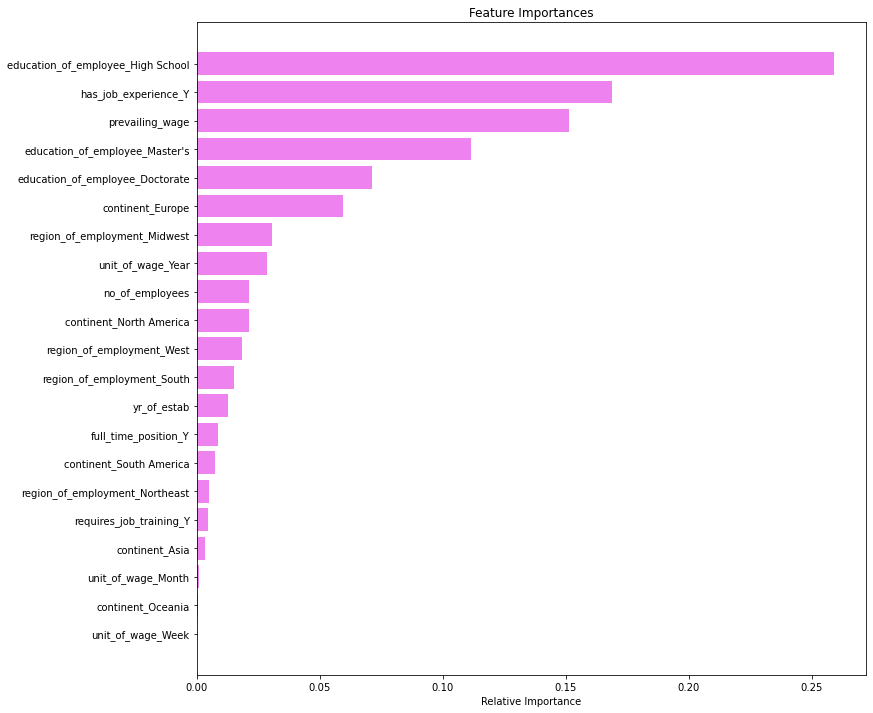

In [462]:
# Plotting the feature importances
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations:
- education_of_employee_High School is the most important feature determining visa certification in our model, followed by has_job_experience_Y and prevailing_wage. 

## Actionable Insights and Recommendations

* We have been able to build a predictive model that company can deploy to help shortlist candidates having higher chances of visa approval by using the drivers of visa certifications. 

* Top 3 factors that drive visa certifications - education_of_employee_High School, has_job_experience_Y and prevailing_wage.

* education_of_employee_High School: Employees with High School education have lesser chances of getting visa certifications. This is also logical as these visa certifications are given when employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment. As compared to Doctorate, Master's and Bachelor's more people would have done High School, hence there are more chances of getting local talent for jobs instead of a foreign worker. In contrast, according to the tuned Gradient Boosting model, employees with Master's and Doctorate have more chances of getting visa certification. This is also seen in our EDA.

* has_job_experience_Y: Employees who have job experience have higher chances of getting visa certifications.

* prevailing_wage: Employees with a higher prevailing wage have a slightly higher chance of visa denial.

* In order to grow the business, company can make visa approval process more efficient by using these factors to build a profile to determine whether or not to shortlist the candidate. For example, if employee has high school education, no job experience and high prevailing wage, the employee would not be shortlisted.